# Imports

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
torch.manual_seed(42)

#  Generate Binary Classification Data

torch.Size([500, 2])
torch.Size([266])
torch.Size([234])
torch.Size([500])


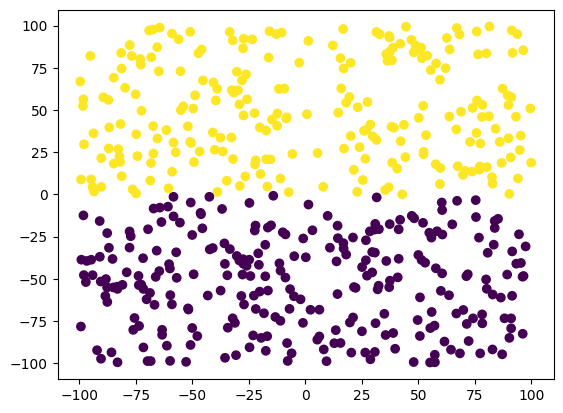

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X = (torch.rand(500, 2) * 200) - 100
X = X.to(device)

print(X.shape)

Y = X[:, 1] > 0
Y = Y.to(torch.float32)
Y = Y.to(device)

print(Y[Y == 0].shape)
print(Y[Y == 1].shape)
print(Y.shape)

plt.scatter(X[:, 0].detach().cpu(), X[:, 1].detach().cpu(), c=Y.detach().cpu())
plt.show() # Clearly Separable

In [3]:
X_train = X[:450]
X_val = X[450:]
Y_train = Y[:450]
Y_val = Y[450:]

print(X_train.shape, X_val.shape)
print(Y_train.shape, Y_val.shape)

torch.Size([450, 2]) torch.Size([50, 2])
torch.Size([450]) torch.Size([50])


# Define Model

In [4]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear1(x).squeeze()

model = LogisticRegression()
model = model.to(device)

# Loss and Optimizer

In [5]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop

Epoch 1 | Training Loss: 18.3690 | Validation Loss: 17.1982 | Validation Accuracy: 0.2600
Epoch 2 | Training Loss: 17.8238 | Validation Loss: 16.4386 | Validation Accuracy: 0.2600
Epoch 3 | Training Loss: 17.2600 | Validation Loss: 15.6996 | Validation Accuracy: 0.2600
Epoch 4 | Training Loss: 17.9944 | Validation Loss: 14.9636 | Validation Accuracy: 0.3000
Epoch 5 | Training Loss: 16.0710 | Validation Loss: 14.1582 | Validation Accuracy: 0.3000
Epoch 6 | Training Loss: 14.9283 | Validation Loss: 13.3761 | Validation Accuracy: 0.3000
Epoch 7 | Training Loss: 14.4160 | Validation Loss: 12.5967 | Validation Accuracy: 0.3000
Epoch 8 | Training Loss: 12.5960 | Validation Loss: 11.8387 | Validation Accuracy: 0.3200
Epoch 9 | Training Loss: 12.7165 | Validation Loss: 11.0885 | Validation Accuracy: 0.3200
Epoch 10 | Training Loss: 11.7628 | Validation Loss: 10.3001 | Validation Accuracy: 0.3200
Epoch 11 | Training Loss: 10.5404 | Validation Loss: 9.5262 | Validation Accuracy: 0.3200
Epoch 12 

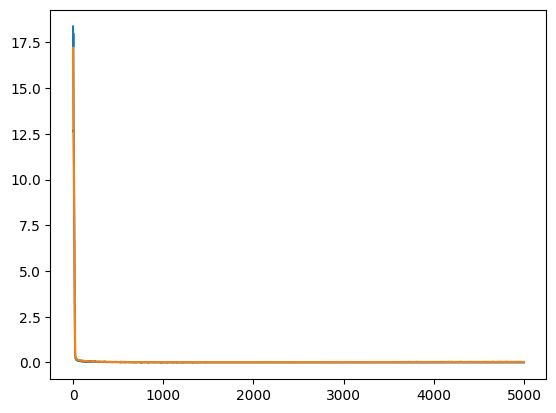

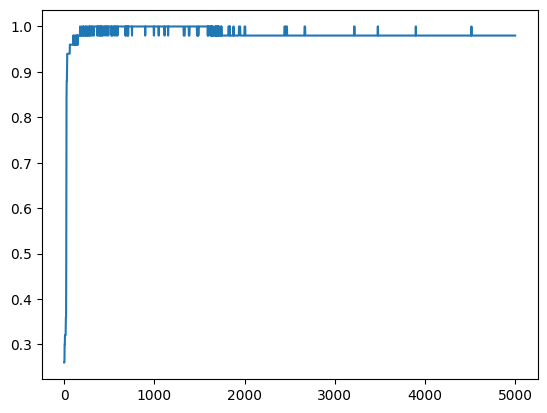

In [6]:
epochs = 5000
mini_batch_size = 32

training_losses = []
validation_losses = []
validation_accuracies = []

# Mini-Batch Training
for epoch in range(epochs):
    model.train()
    training_loss = 0

    indices = torch.randperm(len(X_train))
    X_shuffled = X_train[indices]
    Y_shuffled = Y_train[indices]

    for i in range(0, len(X_train), mini_batch_size):
        X_batch = X_shuffled[i:i+mini_batch_size]
        Y_batch = Y_shuffled[i:i+mini_batch_size]
        Y_hat_batch = model(X_batch)
        loss = criterion(Y_hat_batch, Y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        training_loss += loss.item()

    training_losses.append(training_loss / (len(X_train) / mini_batch_size))

    model.eval()
    with torch.no_grad():
        Y_hat_val = model(X_val)
        validation_loss = criterion(Y_hat_val, Y_val)
        validation_losses.append(validation_loss.item())
        Y_hat_val = (Y_hat_val > 0).to(Y_val.dtype)
        accuracy = (Y_hat_val == Y_val).float().mean().item()
        validation_accuracies.append(accuracy)

    print(f"Epoch {epoch+1} | Training Loss: {training_losses[-1]:.4f} | Validation Loss: {validation_losses[-1]:.4f} | Validation Accuracy: {validation_accuracies[-1]:.4f}")

plt.plot(training_losses, label="Training Loss")
plt.plot(validation_losses, label="Validation Loss")
plt.show()

plt.plot(validation_accuracies, label="Validation Accuracy")
plt.show()

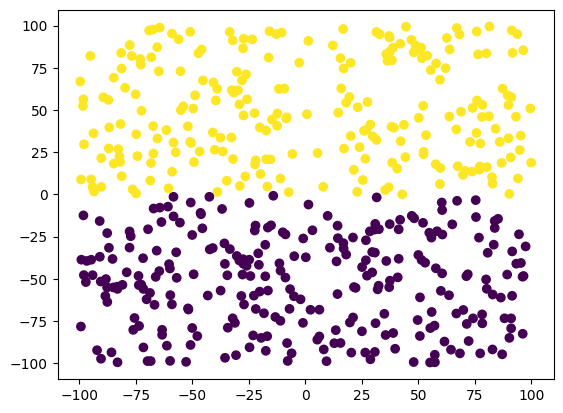

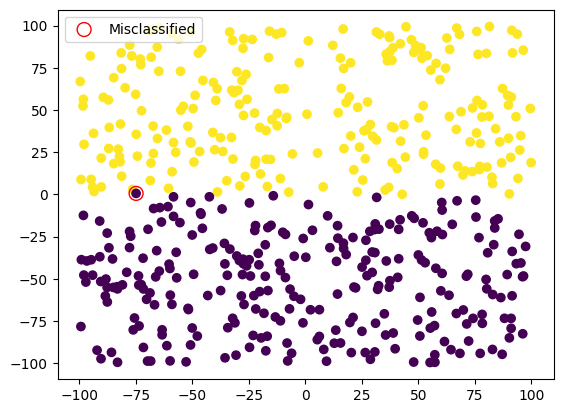

In [14]:
plt.scatter(X[:, 0].detach().cpu(), X[:, 1].detach().cpu(), c=Y.detach().cpu())
plt.show() # Clearly Separable

with torch.no_grad():
    model.eval()
    Y_hat_val = model(X)
    Y_hat_val = (Y_hat_val > 0).to(Y.dtype)

plt.scatter(X[:, 0].detach().cpu(), X[:, 1].detach().cpu(), c=Y_hat_val.detach().cpu())

misclassified = (Y != Y_hat_val).detach().cpu()
plt.scatter(X[misclassified, 0].detach().cpu(), X[misclassified, 1].detach().cpu(), 
            edgecolor='red', facecolor='none', s=100, label='Misclassified')
plt.legend()
plt.show()
